In [1]:
#Importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# import and load csv dataset

my_df = pd.read_csv("T1_A24census2.csv")
my_df.head()
my_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Avenue,Shirley,Newton,32,Head,Single,Female,Art therapist,NaN,Christian
1,2,Scott Avenue,Robert,Smith,76,Head,Widowed,Male,Retired Land,NaN,Christian
2,3,Scott Avenue,Geraldine,Jones,20,Head,Single,Female,University Student,NaN,Christian
3,4,Scott Avenue,Kevin,Steele,33,Head,Single,Male,Youth worker,NaN,Christian
4,5,Scott Avenue,Denis,Adams,40,Head,Single,Male,Glass blower/designer,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
9281,1,Mills Chalet,Richard,Pickering,16,Son,NaN,Male,Student,NaN,No Religion
9282,1,Mills Chalet,Alex,Pickering,12,Son,NaN,Male,Student,NaN,Christian
9283,1,Mills Chalet,Bernard,Pickering,11,Son,NaN,Male,Student,NaN,No Religion
9284,1,Mills Chalet,Sophie,Pickering,7,Daughter,NaN,Female,Student,NaN,Christian


In [5]:
# From the dataset preview above, we can see there are NaN values in some column
# we need to clean our dataset and proceed.
#Using isnull.() to check for any Nan in the Age data
my_df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                            11
Age                                 0
Relationship to Head of House     629
Marital Status                   2149
Gender                              0
Occupation                          0
Infirmity                        9166
Religion                         1097
dtype: int64

In [7]:
# Checking the common values in Relationship to Head of House

Rela_list = my_df['Relationship to Head of House'].unique()
print(Rela_list)

['Head' 'Partner' 'Son' 'Daughter' 'Wife' 'Granddaughter' 'Husband'
 'Sibling' 'Lodger' nan 'Grandson' 'Nephew' 'Step-Son' 'Step-Daughter'
 'Visitor' 'Niece' 'Adopted Daughter' 'Adopted Son' 'Cousin'
 'Daughter-in-law']


In [9]:
# To count the frequency of each value

Relation_list = my_df['Relationship to Head of House'].value_counts()
print(Relation_list)

Relationship to Head of House
Head                3153
Son                 1586
Daughter            1537
Husband              936
Lodger               421
Wife                 351
Partner              266
Grandson             104
Granddaughter         87
Sibling               55
Cousin                47
Visitor               33
Step-Daughter         21
Adopted Son           18
Nephew                11
Step-Son              11
Adopted Daughter      10
Niece                  9
Daughter-in-law        1
Name: count, dtype: int64


In [11]:
# Using house number or street to infer with missing values in Relationship to head of house

# Fill missing values with the mode of the group
my_df['Relationship to Head of House'] = my_df.groupby(['House Number',
                                                        'Street'])['Relationship to Head of House'].transform(lambda x: x.fillna(x.mode()[0]
                                                                                                                                 if not
                                                                                                                                 x.mode().empty
                                                                                                                                 else 'Unknown')
                                                                                                              )

In [13]:
# Cleaning missing surname values based on House Number and Street
my_df['Surname'] = my_df.groupby(['House Number', 'Street'])['Surname'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty
                                                                                                     else 'Unknown'))

In [15]:
# Cleaning missing values in Marital Status. Marital Status can be inferred based on age, gender, relatiom to head of house

# Define a function to fill missing marital status
def clean_marital_status(row):
    if row['Age']< 18:
        return 'Single'
    elif row['Relationship to Head of House'] in ['Wife', 'Husband', 'Partner']:
        return 'Married'
    elif row ['Age']> 65:
        return 'Widowed'
    elif row ['Relationship to Head of House'] in ['Son', 'Daughter', 'Grandson', 'Granddaughter', 'Nephew', 'Niece', 'Step-son',
                                                   'Step-Daughter', 'Adopted Son', 'Adopted Daughter']:
        return 'Single'
    elif row['Relationship to Head of House'] in ['Lodger', 'Visitor', 'Sibling', 'Cousin']:
        return 'Unknown'
    else:
        return 'Single'

my_df['Marital Status'] = my_df['Marital Status'].fillna(my_df.apply(clean_marital_status, axis = 1))

In [17]:
# Check for inconsistencies in marital status
# Define a function to check rows against defined rules and flag inconsistency

def marital_status_check(row):
    age = row['Age']
    relationship = row['Relationship to Head of House']
    marital_status = row['Marital Status']

    # First Rule: Young individuals are unlikely to be "Divorced" or "Widowed"
    if age < 25 and marital_status in ["Divorced", "Widowed"]:
        return True  # Flag as inconsistent

    # Second Rule: Relationship implies "Single" (e.g., Son/Daughter should not be Divorced)
    if relationship in ["Son", "Daughter"] and marital_status not in ["Single"]:
        return True  # Flag as inconsistent

    # Third Rule: Generic fallback for consistency
    if age < 18 and marital_status != "Single":
        # Flag as inconsistent
        return True 
        
    # Row is consistent
    return False  

# Apply the function and create a new column to flag inconsistencies
my_df['Inconsistent Marital Status'] = my_df.apply(marital_status_check, axis=1)

# Display rows with inconsistencies
inconsistent_rows = my_df[my_df['Inconsistent Marital Status'] == True]
print(inconsistent_rows)

      House Number               Street First Name        Surname  Age  \
12               1          Ward Brooks  Christine          Ellis   24   
41              12          Ward Brooks      Katie         Walker   21   
70              26          Ward Brooks       Joel          Baker   31   
104             37          Ward Brooks     Dennis          Davis   34   
127             43          Ward Brooks       Alex          Patel   22   
...            ...                  ...        ...            ...  ...   
9242             1  Edinburgh Longhouse        Ben          Jones   21   
9250             1          Jones House     Amanda   Taylor-Joyce    3   
9256             1       Baker Barracks       Sian  Nelson-French   18   
9257             1       Baker Barracks    Timothy  Nelson-French   18   
9275             1     Lomond Farmhouse   Geoffrey        Carroll   26   

     Relationship to Head of House Marital Status  Gender  \
12                        Daughter       Divorced 

In [19]:
# Fix inconsistent marital status based on the rules derived.
# Define a function

def resolve_marital_status(row):
    if row['Inconsistent Marital Status']:
        age = row['Age']
        relationship = row['Relationship to Head of House']

        # First Rule: Young individuals (< 25) default to "Single"
        if age < 25:
            return "Single"

        # Second Rule: Children (e.g., Son/Daughter) should be "Single"
        if relationship in ["Son", "Daughter", "Grandson", "Granddaughter"]:
            return "Single"

     # If no inconsistency, return the existing marital status
    return row['Marital Status']  


# Apply the fix to the dataset
my_df['Marital Status'] = my_df.apply(resolve_marital_status, axis=1)

In [21]:
# Reapply the function to flag inconsistencies after cleaning
my_df['Inconsistent Marital Status'] = my_df.apply(marital_status_check, axis = 1)

In [23]:
# Verify updated flagged inconsistency

# Display rows flagged as inconsistent
inconsistent_rows = my_df[my_df['Inconsistent Marital Status'] == True]

print(inconsistent_rows)

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Inconsistent Marital Status]
Index: []


From the function to resolve inconsistent marital status, after updating the function and checking to proof the column is now clean, we can 

see it is written empty dataframe, showing all inconsistencies in marital status has been cleaned.

In [25]:
# Handling missing values in Infirmity using age, relationship to house hold, occupation, martial status, gender as inferment
# Define a function  to asssign rule

def check_infirmity(row):
    if row['Age'] > 65:
        # Elderly individuals
        return "Yes"
    elif row['Age'] < 5: 
         # Young children
        return "Likely"
    elif row['Relationship to Head of House'] in ["Grandson", "Granddaughter", "Adopted Son", "Adopted Daughter"]:
        return "Likely"
    elif row['Relationship to Head of House'] in ["Lodger", "Visitor", "Cousin"]:
        # Not enough information
        return "Unknown"  
    else:
         # Default assumption
        return "No" 

# Apply the function to check infirmity
my_df['Infirmity'] = my_df['Infirmity'].fillna(my_df.apply(check_infirmity, axis=1))


In [27]:
# Handle missing values in Religion, with inferment to Relationship to Head of Household

# check the list and values in religion
Religion_list = my_df['Religion'].unique()
print(Religion_list)

['Christian' 'No Religion' nan 'Muslim' 'Sikh' 'Hindu' 'Catholic'
 'Church of England' 'Asia' 'Austrian' 'Blur' 'The Collective' 'Agnostic'
 'Thieves Guild' 'Humanist']


In [29]:
# To count the frequency of each value

Religion_list = my_df['Religion'].value_counts()
print(Religion_list)

Religion
Christian            4073
No Religion          3866
Muslim                125
Hindu                  74
Sikh                   35
Thieves Guild           5
Austrian                3
Catholic                2
Church of England       1
Asia                    1
Blur                    1
The Collective          1
Agnostic                1
Humanist                1
Name: count, dtype: int64


In [31]:
# Define a function to handle missing values and lies in religion

def check_religion(row):
    # infer based on relationship to head of house
    if row['Relationship to Head of House'] in ['Head', 'Wife', 'Husband', 'Partner']:
        return 'Shared with Head'
    elif row['Relationship to Head of House'] in ['Son', 'Daughter', 'Grandson', 'Granddaughter', 'Nephew', 'Niece', 'Step-Son',
                                                  'Step-Daughter', 'Adopted Son', 'Adopted Daughter']:
        return 'Shared with Head'
        
    # Inferment based on predominant religion in the same street or household
    religion_street = my_df[my_df['Street'] == row['Street']]['Religion'].mode() 
    if not religion_street.empty:
        return religion_street[0]

    household_religion = my_df[(my_df['House Number'] == row['House Number']) & (my_df['Street'] == row ['Street'])] ['Religion'].mode()
    if not household_religion.empty:
        return household_religion[0]

    # Dropback for unknown cases
    return 'Unknown'

# Apply the function to infer missing Religion values
my_df['Religion'] = my_df['Religion'].fillna(my_df.apply(check_religion, axis = 1))    

In [33]:
# Check for lies/ inconsistent religion column
# Define a function
def check_inconsistent_religion(row):
    if row['Relationship to Head of House'] in ['Son', 'Daughter', 'Grandson', 'Granddaughter', 'Nephew', 'Niece', 'Step-Son',
                                                'Step-Daughter', 'Adopted Son', 'Adopted Daughter'] and row['Religion'] != 'Shared with Head':
        return True
    return False

# Flag inconsistent rows
my_df ['Inconsistent Religion'] = my_df.apply(check_inconsistent_religion, axis = 1)

# View rows with inconsistency
inconsistent_rows = my_df[my_df['Inconsistent Religion'] == True]
print (inconsistent_rows)

      House Number        Street First Name    Surname  Age  \
6                5  Scott Avenue       Liam      Adams   13   
7                5  Scott Avenue   Kathleen      Adams   11   
9                6  Scott Avenue    Barbara     Clarke   22   
12               1   Ward Brooks  Christine      Ellis   24   
28               8   Ward Brooks   Ashleigh   Williams   12   
...            ...           ...        ...        ...  ...   
9281             1  Mills Chalet    Richard  Pickering   16   
9282             1  Mills Chalet       Alex  Pickering   12   
9283             1  Mills Chalet    Bernard  Pickering   11   
9284             1  Mills Chalet     Sophie  Pickering    7   
9285             1  Mills Chalet       Eric  Pickering    4   

     Relationship to Head of House Marital Status  Gender          Occupation  \
6                              Son         Single    Male             Student   
7                         Daughter         Single  Female             Student   


After completing the function to handle missing values and lies in the religion column, "Shared with Head" became a list of religion

with a value count of 1093. 'Shared with Head' is not a valid religion so i had to define valid religion and replaced it with 'No Religion'

In [35]:
# Define valid values for religion

valid_religion = ['Christian', 'Muslim', 'Hindu', 'Catholic', 'Sikh', 'Church of England', 'No Religion']

# clean invalid or fake religion. replace invalid entries with no religion
def clean_religion(row):
    if row['Religion'] in ['Thieves Guild', 'Austrian', 'Asia', 'Blur', 'The Collective', 'Agnostic', 'Humanist']:
        return 'No Religion'
    if row['Religion'] == 'Shared with Head' and row['Relationship to Head of House'] not in ['Head', 'Wife', 'Husband', 'Partner']:
        return 'No Religion'
    if row ['Religion'] not in valid_religion:
        return 'No Religion'
    return row['Religion']

my_df['Religion'] = my_df.apply(clean_religion, axis = 1)

In [37]:
# Fix inconsistent religions

def check_inconsistent_religion(row):
    religion = row['Religion']
    relationship = row['Relationship to Head of House']
    
    # First rule: "Shared with Head" should match specific relationships
    if religion == "Shared with Head" and relationship not in ["Head", "Wife", "Husband", "Partner"]:
        # Flag as inconsistent
        return True 
        
    # Second rule: "No Religion" is valid for all
    if religion == "No Religion":
        # Always consistent
        return False 
    
    # Third rule: Invalid religion values (if not in valid_religion)
    if religion not in valid_religion:
        # Flag as inconsistent
        return True
        
    # Row is consistent
    return False  

# Apply updated function
my_df['Inconsistent Religion'] = my_df.apply(check_inconsistent_religion, axis=1)

# Check if there is inconsistency
inconsistent_rows = my_df[my_df['Inconsistent Religion'] == True]
print(inconsistent_rows)

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Inconsistent Marital Status, Inconsistent Religion]
Index: []


From the updated function above, we can see inconsistent region column is now empty, showing all inconsistency in the religion column have 

been clean up.

In [39]:
# Check to see our religion value count now. Count the frequency of each value

Religion_list = my_df['Religion'].value_counts()
print(Religion_list)

Religion
No Religion          4971
Christian            4078
Muslim                125
Hindu                  74
Sikh                   35
Catholic                2
Church of England       1
Name: count, dtype: int64


In [41]:
# Check to see if our dataframe is now completely clean.

my_df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Inconsistent Marital Status      0
Inconsistent Religion            0
dtype: int64

In [57]:
# => To examine suspicions in ages through occupation and marital status
# Assuming very young parents are " under 18"
# Assuming unrealistic old individuals are " older than 122"
# Assuming Negative ages exists '(-ve)'
# Assuming there is an under-aged with a wrong marital status

In [43]:
# for unrealistic ages
suspicious_ages = my_df[(my_df['Age'] < 0) | (my_df['Age'] > 122)]
# checking occupation and marital status for suspicious ages
print ('Suspicious Ages with Occupations and Marital Status:')
print (suspicious_ages[['Age', 'Occupation', 'Marital Status']])

#Check for young parents (Age < 18)
young_parents = my_df[(my_df['Age'] < 18) & (my_df['Relationship to Head of House'].str.contains('Father|Mother', case = False, na = False))] 
#print result
print ('\nYoung Parents with Occupations and Marital Status:')
print (young_parents[['Age', 'Occupation', 'Marital Status']])

#Check for missing or ambiguous marital status
missing_marital_status = my_df[my_df['Marital Status'].isnull()]
print ('\nIndividuals with Missing Marital Status:')
print (missing_marital_status[['Age', 'Occupation', 'Marital Status']])


Suspicious Ages with Occupations and Marital Status:
Empty DataFrame
Columns: [Age, Occupation, Marital Status]
Index: []

Young Parents with Occupations and Marital Status:
Empty DataFrame
Columns: [Age, Occupation, Marital Status]
Index: []

Individuals with Missing Marital Status:
Empty DataFrame
Columns: [Age, Occupation, Marital Status]
Index: []


#### From the analysis carried out above, it shows age is clean and has no nan, negative or ambigious age greater than 122 years, marital status for young aged is also clean

# Exercise 1

Using a binwidth of 5 years intervals

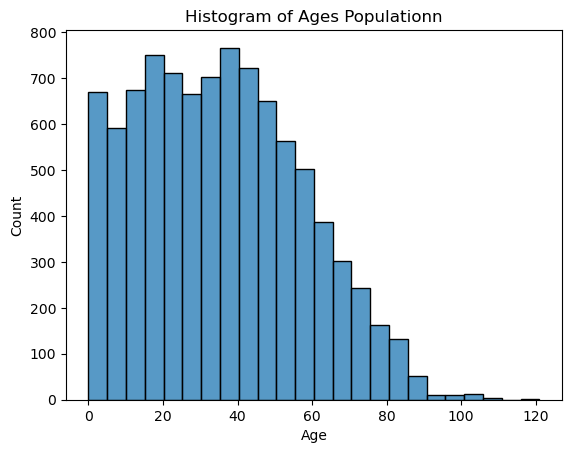

In [45]:
### plotting the histogram of the ages of the population
sns.histplot(my_df['Age'], binwidth = 5 )
plt.title ('Histogram of Ages Populationn')
plt.xlabel('Age')
plt.ylabel ('Count')
plt.show()

# Exercise 2

Using a binwidth of 5 years intervals for male_ages and female_ages

In [47]:
male_ages = my_df[my_df['Gender'] == 'Male']['Age']
female_ages = my_df[my_df['Gender'] == 'Female']['Age']

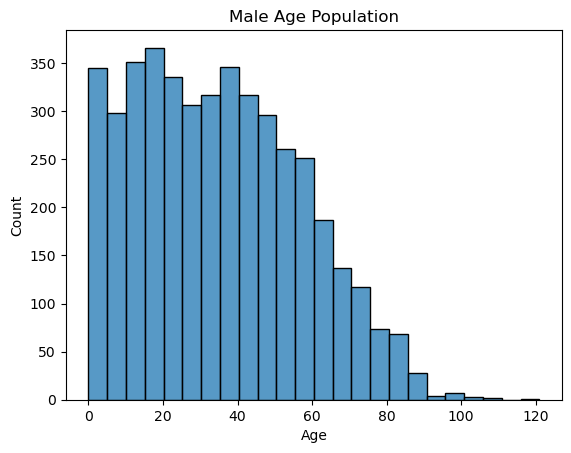

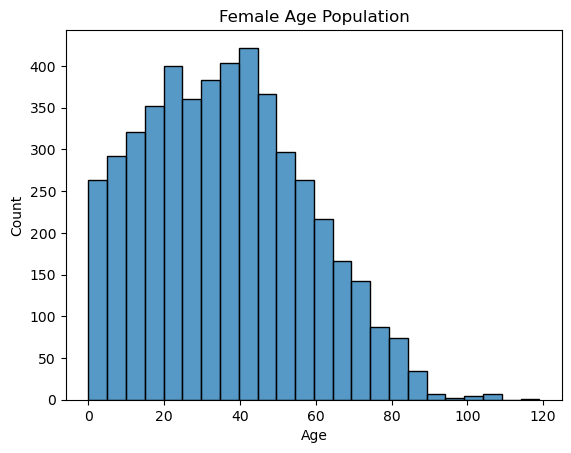

In [49]:
# Plot Histogram for each gender
sns.histplot(male_ages, binwidth = 5)
plt.xlabel('Age')
plt.ylabel ('Count')
plt.title ('Male Age Population')
plt.show()

sns.histplot(female_ages, binwidth = 5)
plt.xlabel('Age')
plt.ylabel ('Count')
plt.title ('Female Age Population')
plt.show()

# Exercise 3i

In [51]:
# Working with 2019estimatesMale.csv and 2019estimatesFemale.csv from the office for National Statistics for 2019
# Reading both data
males = pd.read_csv('2019estimatesMale.csv')
females = pd.read_csv('2019estimatesFemale.csv')
males.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90+
0,"371,576","386,072","398,693","411,883","411,576","414,890","423,939","436,175","429,626","420,942",...,"166,187","150,863","136,325","122,828","106,041","93,770","83,112","71,405","58,821","193,416"


In [53]:
females.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90+
0,"351,305","366,482","378,616","390,451","390,609","394,262","403,210","415,884","409,054","401,870",...,"206,425","193,241","179,876","165,978","149,501","136,897","126,965","114,758","100,820","411,765"


In [55]:
#change numbers from string to integer
males = males.replace(',', '', regex = True).astype(int)

In [57]:
#multiply males by (-1)
males.mul(-1)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90+
0,-371576,-386072,-398693,-411883,-411576,-414890,-423939,-436175,-429626,-420942,...,-166187,-150863,-136325,-122828,-106041,-93770,-83112,-71405,-58821,-193416


In [59]:
#change numbers from string to integer for females
females = females.replace(',', '', regex = True).astype(int)

females.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90+
0,351305,366482,378616,390451,390609,394262,403210,415884,409054,401870,...,206425,193241,179876,165978,149501,136897,126965,114758,100820,411765


# Exercise 3ii

In [61]:
#Flatten male and female data to create the new dataframe
male_flat = males.values.flatten() * -1
female_flat = females.values.flatten()

In [63]:
#List of Ageclasses for our new dataframe 
# Used 90+ instead of 100+ since column size is 91
AgeClass = ['90+','80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']

In [65]:
# Define a function to strip and split age group from ',-,+, to an int


def strip_age_group(age_group):
    """
    Converts age group into a list of numbers.
    """
    if '+' in age_group:
        return [int(age_group.replace("+", ""))]
    elif '-' in age_group: 
        return [int(value) for value in age_group.split("-")]

In [67]:
strip_age_group('90+')

[90]

In [69]:
final_data_dict = {
    'Age': AgeClass,
    'Male': [],
    'Female':[]
}

for class_label in AgeClass:
    numeric_range = strip_age_group(class_label)
    #initialize empty list for ages class
    male_list = []
    female_list= []
    # if class is a single value
    if len (numeric_range) == 1:
        male_list.append(male_flat[numeric_range[0]])
        female_list.append(female_flat[numeric_range[0]])

    #if the range has both a minimum and maximum value
    elif len (numeric_range) == 2:
        min_age, max_age = numeric_range

    # iterate through the range and gather data
        for age in range(min_age, max_age + 1):
            male_list.append(male_flat[age])
            female_list.append(female_flat[age])

    # calculate the totals for the current age range
    total_males = sum(male_list)
    total_females = sum(female_list)

    # Append total to Dictionary
    final_data_dict['Male'].append(total_males)
    final_data_dict['Female'].append(total_females)

# creating new dataframe from the final dictionary
age_p = pd.DataFrame(final_data_dict)

In [71]:
age_p.head()

,Age,Male,Female
0,90+,-193416,411765
1,80-89,-1166491,1590927
2,70-79,-2664225,2979938
3,60-69,-3470240,3653144
4,50-59,-4460221,4606702


# 3iii

[Text(0.5, 0, 'Population Count'), Text(0, 0.5, 'Age Group')]

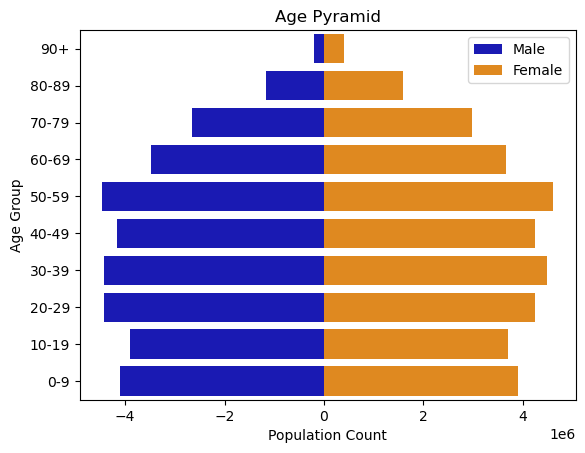

In [73]:
# Plot Age pyramid
age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass, color=('mediumblue'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass, color=('darkorange'), label='Female')

age_pyramid.legend()

plt.title('Age Pyramid')
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')

# 4

## Age population pyramid for Project Data. Using a binwidth of 5 years intervals

In [75]:
# Create age data and concatenate into one dataframe 

male_ages = my_df[my_df['Gender'] == 'Male']['Age']
female_ages = my_df[my_df['Gender'] == 'Female']['Age']

# Create dataframes for each gender
male_data = pd.DataFrame({'Age': male_ages, 'Gender': 'Male'})
female_data = pd.DataFrame({'Age': female_ages, 'Gender': 'Female'})

# Concatenate 
age_data = pd.concat([male_data, female_data], ignore_index=True)

# check the result
print(age_data)

      Age  Gender
0      76    Male
1      33    Male
2      40    Male
3      13    Male
4      46    Male
...   ...     ...
9281   40  Female
9282   25  Female
9283   41  Female
9284   19  Female
9285    7  Female

[9286 rows x 2 columns]


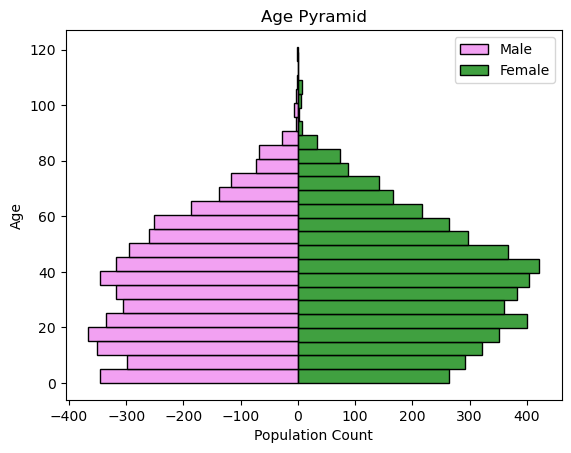

In [77]:

# Bin age data into intervals
# Age intervals from 0 to 100 with 5-year bins
#bins = np.arange(0, 91, 5)


# Create separate male and female datasets
male_data = age_data[age_data['Gender'] == 'Male']
female_data = age_data[age_data['Gender'] == 'Female']

# Plot males on the left with negative weights
sns.histplot(
    data=male_data,
    y="Age",
    # negative weights for males
    weights= -1 * np.ones(len(male_data)), 
    binwidth=5,
    color="Violet",
    label="Male"
)

# Plot females on the right with positive weights
sns.histplot(
    data=female_data,
    y="Age",
    # Positive weights for females
    weights= np.ones(len(female_data)),
    binwidth=5,
    color="green",
    label="Female"
)

# Set y axis to represent intervals
#plt.yticks(ticks = bins, labels = [f'{i}-{i+4}' for i in bins[:-1]])

# Add labels and title
plt.xlabel("Population Count")
plt.ylabel("Age")
plt.title("Age Pyramid")
plt.legend()
plt.show()

## Exercise 5

Science.
Does the age pyramid from your project look anything like the age pyramid from the government
statistics? What are the differences (if any)? Why do you think those differences arise and are they
significant?

The pyramid from my project looks like the age pyramid from goverment statistics, although differences can be spotted from the two.

Data source and quality can be an issue, since my project data is from a mock census of an imaginary town, and the government pyramid represent a large-scale population. This naturally will create a deviation in both results.

These differences are significant because my project age pyramid draws conclusion about a population of a town simulated using the Faker package in Python compared to the government data which is likely highly accurate and sourced from official records.

## Exercise 6

Science and coding.
We will have to make some kind of evaluation about commuters in the Project data set.
By “commuter” we mean someone who might live in the town that the census has been taken in,
but works in one of the nearby cities, rather than within the town itself.
Question for discussion / Teams: how would you identify a commuter?
This is not an easy question as the data given didn’t record this in any systematic way.
(Aside: modern era censuses directly ask this).
But! Could we infer the existence of commuters somehow?
Are there certain classes of people in the census who must be commuters?
Are there certain types of people who are more likely than others to be commuters? Why?
Justify your answer.
Once you have decided how you might infer who are commuters, try to determine how many such
commuters exist in the data set by finding people who match your criteria.
As a fraction of the population, how many people work outside the town and therefore need to
travel significant distances for work?
This exercise requires a few assumptions and guess work. But can you make a rigorous argument
about it?


We can possible infer commuter status from the dataframe with occupation type, high skilled / specialised jobs are often located in bigger cities compared to small towns e.g IT, law, management.

Age is another factor that can help infer commuter status, people in working age range 18-60 who are full time empolyed are more likely to commute. Relationship to Head of House can also be used as a factor to determine commters, Head, Spouses in professional jobs are more likely to commute compared to dependants.

In [79]:
# Veiw the value count of occupation
my_df['Occupation'].value_counts()

Occupation
Student                                    1763
University Student                          644
Unemployed                                  576
Child                                       548
PhD Student                                  21
                                           ... 
Retired Chief Operating Officer               1
Retired Gaffer                                1
Retired Intelligence analyst                  1
Retired Chief Financial Officer               1
Retired Producer, television/film/video       1
Name: count, Length: 1078, dtype: int64

In [81]:
# itemise occupation to see how many people work in different sectors in the dataset
for k, v in my_df['Occupation'].value_counts().items():
    if v > 1:
        print (k, ' ----->', v)

Student  -----> 1763
University Student  -----> 644
Unemployed  -----> 576
Child  -----> 548
PhD Student  -----> 21
Community pharmacist  -----> 20
Sales professional, IT  -----> 18
Operations geologist  -----> 16
Production assistant, radio  -----> 16
Hydrographic surveyor  -----> 15
Medical secretary  -----> 15
Chief Financial Officer  -----> 15
Lobbyist  -----> 15
Actor  -----> 15
Engineer, materials  -----> 14
Public house manager  -----> 14
Merchant navy officer  -----> 14
Site engineer  -----> 14
Forensic psychologist  -----> 14
Producer, television/film/video  -----> 14
Colour technologist  -----> 14
Pharmacist, community  -----> 14
Air broker  -----> 14
Heritage manager  -----> 13
Secretary, company  -----> 13
Games developer  -----> 13
Midwife  -----> 13
Software engineer  -----> 13
Chartered certified accountant  -----> 13
Engineer, broadcasting (operations)  -----> 13
Set designer  -----> 13
Mudlogger  -----> 13
Industrial buyer  -----> 13
Fine artist  -----> 13
Doctor, hosp

In [83]:
# Display all unique occupations in the dataset
unique_occupations = my_df['Occupation'].unique()
print("Unique Occupations in the Dataset:")
for i, occupation in enumerate(unique_occupations, 1):
    print(f"{i}. {occupation}")

Unique Occupations in the Dataset:
1. Art therapist
2. Retired Land
3. University Student
4. Youth worker
5. Glass blower/designer
6. Hydrologist
7. Student
8. Control and instrumentation engineer
9. Music therapist
10. Doctor, hospital
11. Chiropodist
12. Child
13. Broadcast journalist
14. IT sales professional
15. Unemployed
16. Retired Pharmacist, hospital
17. Retired Regulatory affairs officer
18. Scientist, water quality
19. Community education officer
20. Therapist, drama
21. Arboriculturist
22. Applications developer
23. Tourism officer
24. Charity fundraiser
25. Set designer
26. Farm manager
27. Social research officer, government
28. Loss adjuster, chartered
29. Retired Administrator, Civil Service
30. Public affairs consultant
31. Media buyer
32. Education officer, museum
33. Programme researcher, broadcasting/film/video
34. Lawyer
35. Retired Garment/textile technologist
36. Retired Barrister
37. Retired Surveyor, planning and development
38. Programmer, systems
39. Retired 

In [111]:
# Create a function to manually select occupations that likely involve commuting

def identify_commuter_occupations():
    print("\nSelect the numbers of the occupations that are likely commuters (comma-separated):")
    selected_numbers = input("Enter numbers: ")
    
    # Convert input into a list of selected occupations
    selected_indices = [int(num.strip()) - 1 for num in selected_numbers.split(',') if num.strip().isdigit()]
    commuter_occupations = [unique_occupations[i] for i in selected_indices]
    
    return commuter_occupations

# Use function to select occupations
commuter_occupations = identify_commuter_occupations()
print("\nSelected Commuter Occupations:", commuter_occupations)


Select the numbers of the occupations that are likely commuters (comma-separated):


Enter numbers:  3,6,8,10,13,14,18,21,33,34,40,41,42,45,50,51,62,64,67,77,83,84,85,86,87,88,92,93,96,97,99,104,109,111,118,120,125,133,136,137,138,139,140,141,143,146,148,149,150,155,156,157,158,160,170,175,177,184,185,192,194,195,198,199,202,204,205,208,209,211,212,213,215,216,220,221,222,225,226,228,229,230,232,234,235,236,238,241,243,244,245,247,256,257,262,263,266,268,277,280,288,291,293,295,297,298,299,304,305,306,308,309,310,311,312,314,315,316,318,319,320,321,323,325,326,328,331,336,337,338,348,350,353,355,359,361,362,364,365,369,371,373,377,379,384,387,391,396,397,398,402,403,405,406,409,410,411,414,416,418,419,420,421,422,424,425,426,429,435,439,442,446,447,448,449,454,457,462,463,464,465,467,468,471,473,476,478,479,481,482,483,485,488,489,492,502,506,507,508,509,510,511,513,514,515,517,530,532,542,546,549,550,551,560,562,564,565,567,568,569,571,576,580,588,589,590,593,596,602,603,604,605,607,608,609,614,619,620,621,622,626,630,634,635,637,641,644,647,653,654,655,664,666,667,66


Selected Commuter Occupations: ['University Student', 'Hydrologist', 'Control and instrumentation engineer', 'Doctor, hospital', 'Broadcast journalist', 'IT sales professional', 'Scientist, water quality', 'Arboriculturist', 'Programme researcher, broadcasting/film/video', 'Lawyer', 'Scientist, forensic', 'Physiological scientist', 'Psychologist, sport and exercise', 'Sport and exercise psychologist', 'Engineer, automotive', 'Scientist, research (life sciences)', 'Engineer, building services', 'Archaeologist', 'Scientist, research (physical sciences)', 'Paramedic', 'Social worker', 'Water engineer', 'Medical technical officer', 'Scientist, audiological', 'Engineer, chemical', 'Production assistant, radio', 'Magazine journalist', 'Historic buildings inspector/conservation officer', 'Geophysicist/field seismologist', 'Special effects artist', 'Oncologist', 'Scientist, clinical (histocompatibility and immunogenetics)', 'Manufacturing systems engineer', 'Scientist, biomedical', 'Conservat

In [113]:
# Now we filter dataset for selected occupations and working-age individuals (18-60)
potential_commuters = my_df[(my_df['Occupation'].isin(commuter_occupations)) & (my_df['Age'].between(18, 60))]

# Show results
num_commuters = len(potential_commuters)
total_population = len(my_df)
commuter_fraction = num_commuters / total_population

print(f"\nEstimated Number of Commuters: {num_commuters}")
print(f"Fraction of Population Commuting: {commuter_fraction:.2%}")


Estimated Number of Commuters: 3018
Fraction of Population Commuting: 32.50%


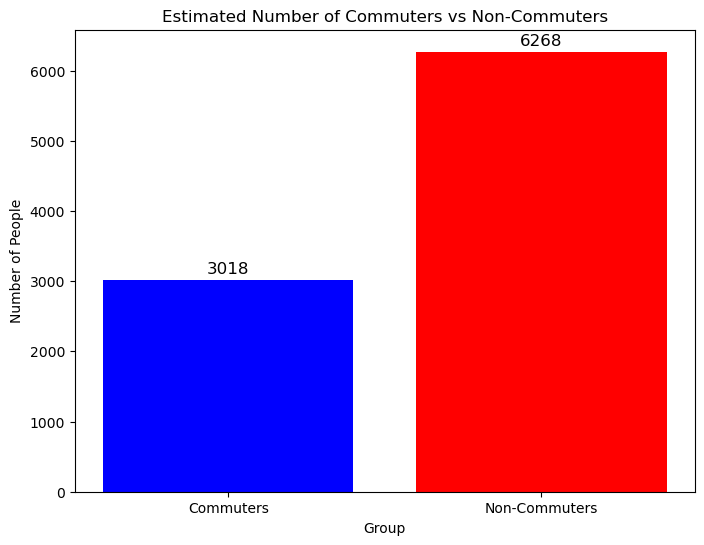

In [143]:
# Data for visualization
num_non_commuters = total_population - num_commuters
labels = ['Commuters', 'Non-Commuters']
counts = [num_commuters, num_non_commuters]
colors = ['blue', 'red']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
plt.title('Estimated Number of Commuters vs Non-Commuters')
plt.ylabel('Number of People')
plt.xlabel('Group')
for i, v in enumerate(counts):
    plt.text(i, v + total_population * 0.01, f'{v}', ha='center', fontsize=12)
plt.show()

From the analysis above we can see 3018 commuters out of a total population of 9285, resulting in a 32.50% commuter rate.

We can notice there is a high or significant mobility, suggesting that the town may serve as a residential hub for nearby cities. Also economic dependance indicating that there could be limited local jobs pushing the residents to work in other regions.

In [125]:
my_df['Occupation'].unique()

array(['Art therapist', 'Retired Land', 'University Student', ...,
       'Retired Mudlogger', 'Retired Electrical engineer',
       'Retired Producer, television/film/video'], dtype=object)

In [131]:
# Get information of employed and unemployed


# Define categories for unemployed statuses
unemployed_categories = ['Unemployed', 'Student', 'Retired', 'Disabled', 'None', 'Unknown']

# Create a new column 'Employment_Status' based on 'Occupation'
my_df['Employment_Status'] = my_df['Occupation'].apply(lambda x: 'Unemployed' if x in unemployed_categories else 'Employed')

# Filter the working-age population, assuming it is (16-65 years old)
working_age_population = my_df[(my_df['Age'] >= 16) & (my_df['Age'] <= 65)]

# Count the number of employed and unemployed individuals
employed_count = working_age_population[working_age_population['Employment_Status'] == 'Employed'].shape[0]
unemployed_count = working_age_population[working_age_population['Employment_Status'] == 'Unemployed'].shape[0]

# Calculate the total labor force (Employed + Unemployed)
labor_force = employed_count + unemployed_count

# Calculate employment and unemployment rates
if labor_force > 0:
    employment_rate = (employed_count / labor_force) * 100
    unemployment_rate = (unemployed_count / labor_force) * 100
else:
    employment_rate = 0
    unemployment_rate = 0

# Display the results
print(f"Employment Rate: {employment_rate:.2f}%")
print(f"Unemployment Rate: {unemployment_rate:.2f}%")

Employment Rate: 85.89%
Unemployment Rate: 14.11%


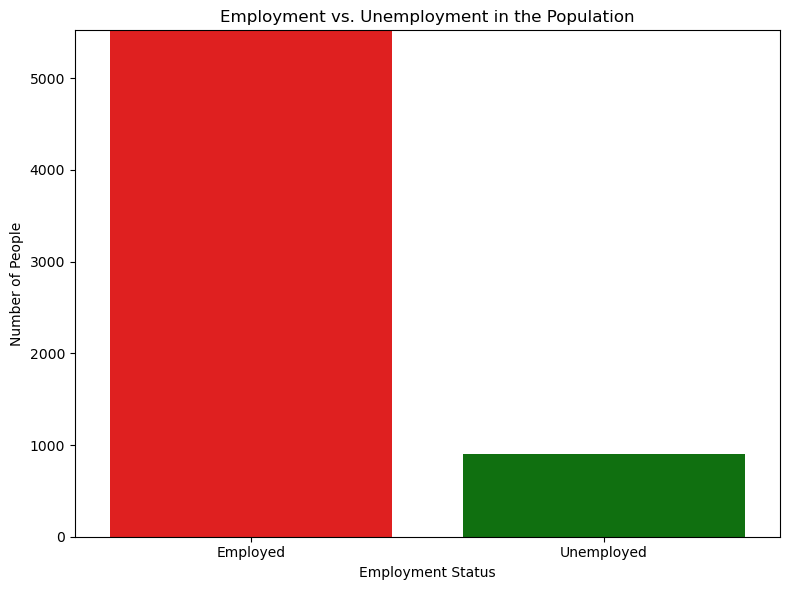

In [153]:
# Data for visualization
employment_data = {
    'Status': ['Employed', 'Unemployed'],
    'Count': [employed_count, unemployed_count]}

# Convert to dataframe for plotting
employment_df = pd.DataFrame(employment_data)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x ='Status', y ='Count', data = employment_df , hue= 'Status', palette =['red', 'green'])
plt.title('Employment vs. Unemployment in the Population')
plt.xlabel('Employment Status')
plt.ylabel('Number of People')
plt.ylim(0, max(employment_df['Count']) + 10)
plt.tight_layout()
plt.show()

In [123]:
# Save my cleaned DataFrame with a new name

my_df.to_csv('T1_A24census2_cleaned.csv', index=False)

Reference.

Wes Mckinney, Python for Data Analysis, Data Wrangling with Pandas, Numpy and Ipython